In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('/content/drive/MyDrive/bike - task 18B.xlsx - Raw-Data.csv')

In [4]:
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,M,F,"$40,000.00",1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,M,M,"$30,000.00",3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,M,M,"$80,000.00",5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,S,M,"$70,000.00",0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,S,M,"$30,000.00",0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1026 non-null   int64 
 1   Marital Status    1026 non-null   object
 2   Gender            1026 non-null   object
 3   Income            1026 non-null   object
 4   Children          1026 non-null   int64 
 5   Education         1026 non-null   object
 6   Occupation        1026 non-null   object
 7   Home Owner        1026 non-null   object
 8   Cars              1026 non-null   int64 
 9   Commute Distance  1026 non-null   object
 10  Region            1026 non-null   object
 11  Age               1026 non-null   int64 
 12  Purchased Bike    1026 non-null   object
dtypes: int64(4), object(9)
memory usage: 104.3+ KB


In [6]:
df.duplicated().sum()

26

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1000 non-null   int64 
 1   Marital Status    1000 non-null   object
 2   Gender            1000 non-null   object
 3   Income            1000 non-null   object
 4   Children          1000 non-null   int64 
 5   Education         1000 non-null   object
 6   Occupation        1000 non-null   object
 7   Home Owner        1000 non-null   object
 8   Cars              1000 non-null   int64 
 9   Commute Distance  1000 non-null   object
 10  Region            1000 non-null   object
 11  Age               1000 non-null   int64 
 12  Purchased Bike    1000 non-null   object
dtypes: int64(4), object(9)
memory usage: 109.4+ KB


In [9]:
for col in df.columns:
    print(col, '\n', len(df[col].unique()))

ID 
 1000
Marital Status 
 2
Gender 
 2
Income 
 16
Children 
 6
Education 
 5
Occupation 
 5
Home Owner 
 2
Cars 
 5
Commute Distance 
 5
Region 
 3
Age 
 53
Purchased Bike 
 2


In [10]:
#df['Income'] = df['Income'].str.replace('', '').str.replace(',', '').astype(float).astype('Int64')
# The code first removes the '' and ',' symbols from the 'Income' column using the str.replace() method.
# Then, it converts the cleaned values to floats using astype(float) to handle the decimal point.
# Finally, it converts the floats to integers using astype('Int64')
df['Income'] = df['Income'].str.replace('$', '').str.replace(',', '').astype(float)

In [11]:
#Customer segment by Gender
group_by_gen = df.groupby(['Gender']).agg({'Purchased Bike':'count'}).reset_index()
group_by_gen['Gender'] = group_by_gen['Gender'].replace({'M': 'Male', 'F': 'Female'})
group_by_gen

,Gender,Purchased Bike
0,Female,489
1,Male,511


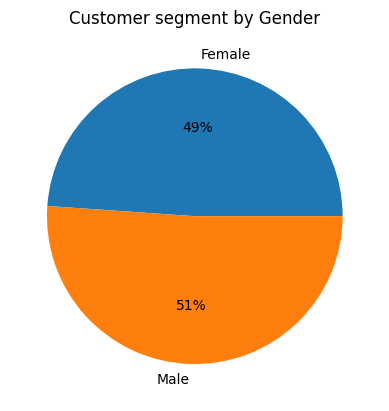

<Figure size 700x400 with 0 Axes>

In [12]:
plt.pie(group_by_gen['Purchased Bike'], labels = group_by_gen['Gender'], autopct='%.0f%%')
plt.title('Customer segment by Gender')
plt.figure(figsize=(7,4))
plt.show()

In [13]:
#Customer Segment by Marital Status
group_by_mar = df.groupby(['Marital Status']).agg({'Purchased Bike':'count'}).reset_index()
group_by_mar['Marital Status'] = group_by_mar['Marital Status'].replace({'M': 'Married', 'S': 'Single'})
group_by_mar

,Marital Status,Purchased Bike
0,Married,538
1,Single,462


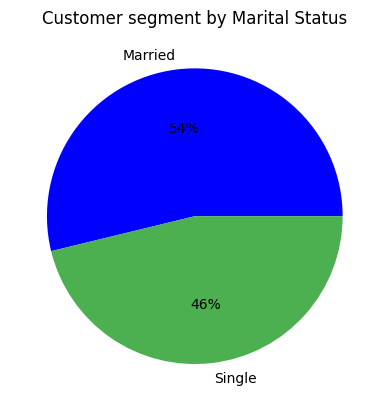

<Figure size 700x400 with 0 Axes>

In [14]:
mycolors = ["blue", "#4CAF50"]
plt.pie(group_by_mar['Purchased Bike'], labels = group_by_mar['Marital Status'],colors= mycolors, autopct='%.0f%%')
plt.title('Customer segment by Marital Status')
plt.figure(figsize=(7,4))
plt.show()

In [15]:
#Customer segment by Education
group_by_edu = df.groupby(['Education']).agg({'Purchased Bike':'count'}).reset_index()
#group_by_edu['Education'] = group_by_mar['Education'].replace({'M': 'Married', 'S': 'Single'})
group_by_edu

,Education,Purchased Bike
0,Bachelors,306
1,Graduate Degree,174
2,High School,179
3,Partial College,265
4,Partial High School,76


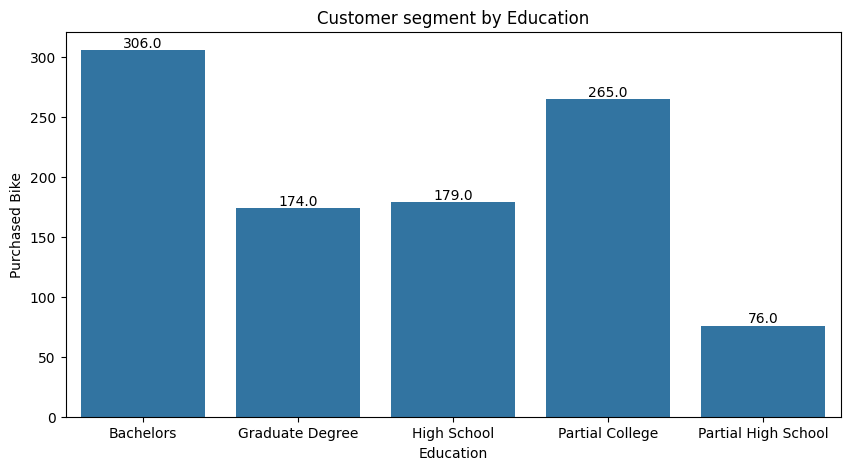

In [16]:
plt.figure(figsize=(10,5))
Y = sns.barplot(x='Education', y='Purchased Bike', data=group_by_edu)
plt.title('Customer segment by Education')
for i, v in enumerate(Y.patches):
    plt.text(v.get_x() + v.get_width() / 2., v.get_height(), str(v.get_height()), ha='center', va='bottom')
plt.show()

In [17]:
#Customer segment by Education
group_by_occ = df.groupby(['Occupation']).agg({'Purchased Bike':'count'}).reset_index()
group_by_occ

,Occupation,Purchased Bike
0,Clerical,177
1,Management,173
2,Manual,119
3,Professional,276
4,Skilled Manual,255


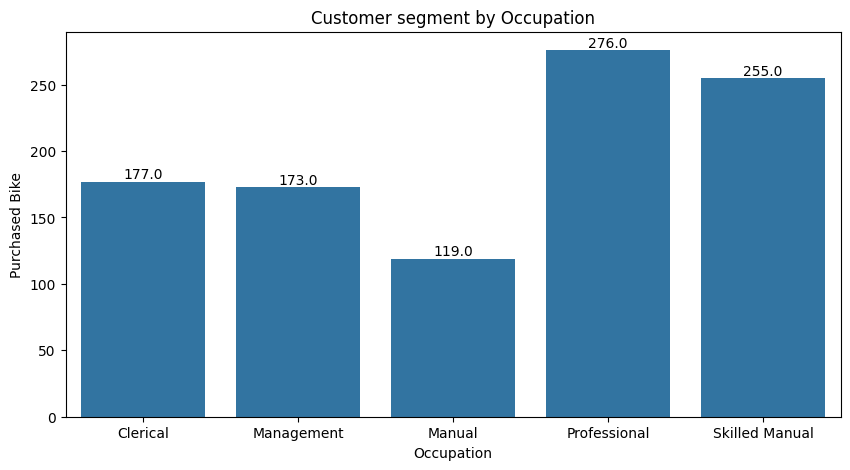

In [18]:
plt.figure(figsize=(10,5))
Y = sns.barplot(x='Occupation', y='Purchased Bike', data=group_by_occ)
plt.title('Customer segment by Occupation')
for i, v in enumerate(Y.patches):
    plt.text(v.get_x() + v.get_width() / 2., v.get_height(), str(v.get_height()), ha='center', va='bottom')
plt.show()

In [19]:
#Customer segment by Region
group_by_reg = df.groupby(['Region']).agg({'Purchased Bike':'count'}).reset_index()
group_by_reg

,Region,Purchased Bike
0,Europe,300
1,North America,508
2,Pacific,192


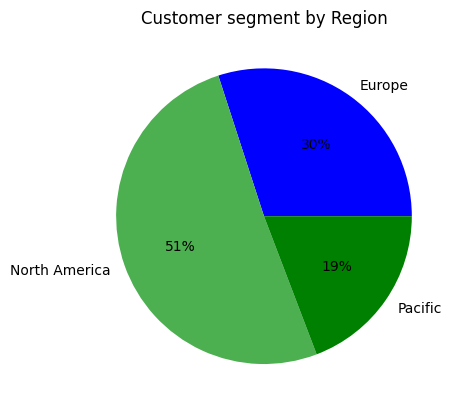

<Figure size 700x400 with 0 Axes>

In [20]:
mycolors = ["blue", "#4CAF50",'green']
plt.pie(group_by_reg['Purchased Bike'], labels = group_by_reg['Region'],colors= mycolors, autopct='%.0f%%')
plt.title('Customer segment by Region')
plt.figure(figsize=(7,4))
plt.show()

In [21]:
#Customer Segment by Income
# Create income groups (bins)
income_bins = [10000, 50000, 100000, 150000, 200000]
income_labels = ['Low Income', 'Lower-Middle Income', 'Upper-Middle Income', 'High Income']
df['income_group'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels)


group_by_income = df.groupby(['income_group']).agg({'Purchased Bike':'count'}).reset_index()
group_by_income

<ipython-input-21-5c113252030f>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_by_income = df.groupby(['income_group']).agg({'Purchased Bike':'count'}).reset_index()


,income_group,Purchased Bike
0,Low Income,403
1,Lower-Middle Income,448
2,Upper-Middle Income,70
3,High Income,6


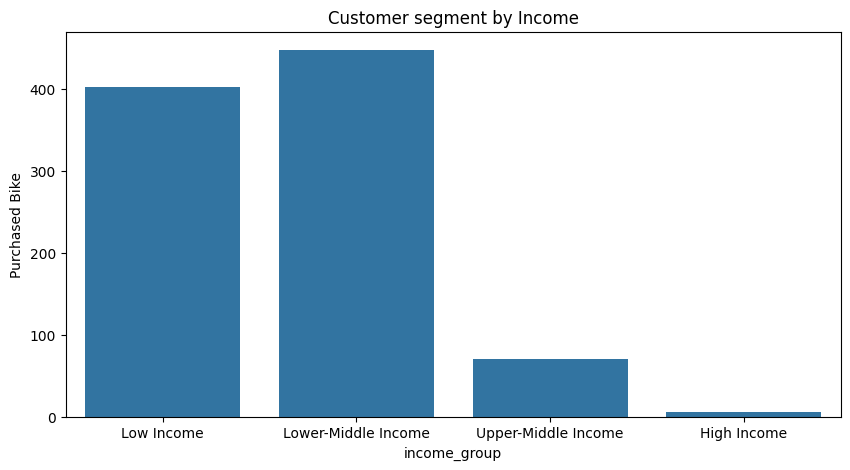

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(x='income_group', y='Purchased Bike', data=group_by_income)
plt.title('Customer segment by Income')
plt.show()

**Income-based segmentation**

In [23]:

# Create income groups (bins)
income_bins = [10000, 50000, 100000, 150000, 200000]
income_labels = ['Low Income', 'Lower-Middle Income', 'Upper-Middle Income', 'High Income']
df['income_group'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels)

# Group by income group and purchased_bike, and count how many purchased or not
grouped = df.groupby(['income_group', 'Purchased Bike']).agg(
    customer_count=pd.NamedAgg(column='ID', aggfunc='count')
).reset_index()

# Pivot the table to make it easier to analyze
pivot_table = grouped.pivot(index='income_group', columns='Purchased Bike', values='customer_count').fillna(0)

# Calculate the percentage of people who purchased bikes in each income group
pivot_table['total_customers'] = pivot_table['Yes'] + pivot_table['No']
pivot_table['bike_purchase_rate(%)'] = (pivot_table['Yes'] / pivot_table['total_customers']) * 100

<ipython-input-23-c392ce355a6d>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['income_group', 'Purchased Bike']).agg(


In [24]:
print(pivot_table)

Purchased Bike        No  Yes  total_customers  bike_purchase_rate(%)
income_group                                                         
Low Income           208  195              403              48.387097
Lower-Middle Income  230  218              448              48.660714
Upper-Middle Income   34   36               70              51.428571
High Income            2    4                6              66.666667


In [ ]:
#segment_sales = df.groupby(['Children', 'Education', 'Region'])['Income'].sum().reset_index()

**SEGMENTS THAT CONTRIBUTES TO SALES**

In [25]:
PurchasedBike =  df[df['Purchased Bike']=='Yes']
PurchasedBike.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,income_group
3,24381,S,M,70000.0,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes,Lower-Middle Income
4,25597,S,M,30000.0,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes,Low Income
6,27974,S,M,160000.0,2,High School,Management,Yes,4,0-1 Miles,Pacific,33,Yes,High Income
7,19364,M,M,40000.0,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,43,Yes,Low Income
9,19280,M,M,120000.0,2,Partial College,Manual,Yes,1,0-1 Miles,Europe,40,Yes,Upper-Middle Income


In [26]:
#Segment by People with children
group_by_children = PurchasedBike.groupby(['Children']).agg({'Purchased Bike':'count'}).reset_index()
group_by_children

,Children,Purchased Bike
0,0,142
1,1,97
2,2,97
3,3,73
4,4,54
5,5,18


In [27]:
#segment by Education
group_by_education = PurchasedBike.groupby(['Education']).agg({'Purchased Bike':'count'}).reset_index()
group_by_education

,Education,Purchased Bike
0,Bachelors,169
1,Graduate Degree,94
2,High School,79
3,Partial College,119
4,Partial High School,20


In [28]:
#segment by region
group_by_region = PurchasedBike.groupby(['Region']).agg({'Purchased Bike':'count'}).reset_index()
group_by_region

,Region,Purchased Bike
0,Europe,148
1,North America,220
2,Pacific,113


In [29]:
# Create income groups (bins)
age_bins = [25, 40, 56, 71, 90]
age_labels = ['Youth', 'Adult', 'Middle age', 'Old age']
PurchasedBike['age_group'] = pd.cut(PurchasedBike['Age'], bins=age_bins, labels=age_labels)

<ipython-input-29-8d89bb0db422>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PurchasedBike['age_group'] = pd.cut(PurchasedBike['Age'], bins=age_bins, labels=age_labels)


In [ ]:
#df2 = PurchasedBike.groupby(['age_group']).agg({'Purchased Bike':'count'}).reset_index()
#df2
#PurchasedBike.age_group


In [30]:
demographic_factors = ['age_group', 'Marital Status','Gender', 'Region']

In [31]:
By_demographic = PurchasedBike.groupby(demographic_factors).agg(
    total_customers=pd.NamedAgg(column='Purchased Bike', aggfunc='count')  # Count total customers
).reset_index()

<ipython-input-31-8aa432fc321f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  By_demographic = PurchasedBike.groupby(demographic_factors).agg(


In [32]:
By_demographic

,age_group,Marital Status,Gender,Region,total_customers
0,Youth,M,F,Europe,18
1,Youth,M,F,North America,17
2,Youth,M,F,Pacific,7
3,Youth,M,M,Europe,16
4,Youth,M,M,North America,23
5,Youth,M,M,Pacific,15
6,Youth,S,F,Europe,27
7,Youth,S,F,North America,28
8,Youth,S,F,Pacific,13
9,Youth,S,M,Europe,26


In [33]:
#Profit Margin Hypotetically
profit_per_bike = 2000
bike_sales = 10000

In [34]:
#calculating number of bike sold
df['bike_sold'] = df['Purchased Bike'].apply(lambda x: 1 if x=='Yes' else 0)

In [35]:
#calculating profit
df['profit'] = df['bike_sold'] * profit_per_bike

In [36]:
#calculating revenue
df['revenue'] = df['bike_sold'] * bike_sales

In [37]:
# Summarize total bikes sold, total revenue, and total profit
total_bikes_sold = df['bike_sold'].sum()
total_revenue = df['revenue'].sum()
total_profit = df['profit'].sum()

In [38]:
# Calculate profit margin
profit_margin = (total_profit / total_revenue) * 100

In [39]:
# Display results
print(f"Total Bikes Sold: {total_bikes_sold}")
print(f"Total Revenue: ${total_revenue}")
print(f"Total Profit: ${total_profit}")
print(f"Profit Margin: {profit_margin:.2f}%")

Total Bikes Sold: 481
Total Revenue: $4810000
Total Profit: $962000
Profit Margin: 20.00%
